In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_csv(r"C:\Users\Shaurya\Desktop\Gold_Price.csv",index_col="ds",parse_dates=["ds"])

In [3]:
df.head()

,y
ds,
2015-01-01,26586
2015-01-02,26700
2015-01-05,26847
2015-01-06,27385
2015-01-07,27159


In [4]:
df.describe()

,y
count,1637.000000
mean,33671.213806
std,7759.849682
min,24545.000000
25%,28617.000000
50%,30551.000000
75%,37961.000000
max,56117.000000


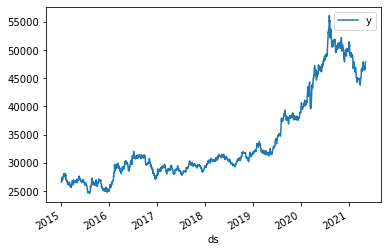

In [5]:
df.plot()

In [6]:
#Using Auto ARIMA

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df.y, test_size=0.1, shuffle=False)

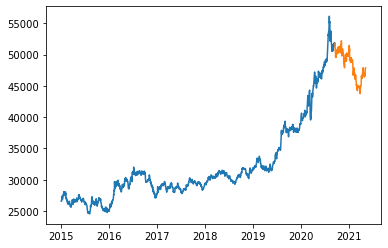

In [8]:
plt.plot(train)
plt.plot(test)

In [9]:
from pmdarima.arima import auto_arima

In [10]:
AUTOARIMA = auto_arima(train)

In [11]:
AUTOARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1473
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -10538.402
Date:                Mon, 10 May 2021   AIC                          21088.804
Time:                        21:33:23   BIC                          21120.566
Sample:                             0   HQIC                         21100.648
                               - 1473                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7772      0.016    -48.902      0.000      -0.808      -0.746
ar.L2         -0.5626      0.020    -28.453      0.000      -0.601      -0.524
ar.L3         -0.3846      0.017    -22.369      0.000      -0.418      -0.351
ar.L4         -0.3247      0.019    -17.495      0.000      -0.361      -0.288
ar.L5         -0.2145      0.016    -13.044      0.000      -0.247      -0.182
sigma2      9.544e+04   1583.617     60.265      0.000    9.23e+04    9.85e+04
===================================================================================
Ljung-Box (Q):                      105.63   Jarque-Bera (JB):              8292.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
test.shape

(164,)

In [13]:
prediction = pd.DataFrame(AUTOARIMA.predict(164),index=test.index)
prediction

,0
ds,
2020-09-18,51484.442028
2020-09-21,51360.363052
2020-09-22,51350.973207
2020-09-23,51316.269001
2020-09-24,51254.392024
...,...
2021-05-04,40424.735750
2021-05-05,40355.080332
2021-05-06,40285.424914


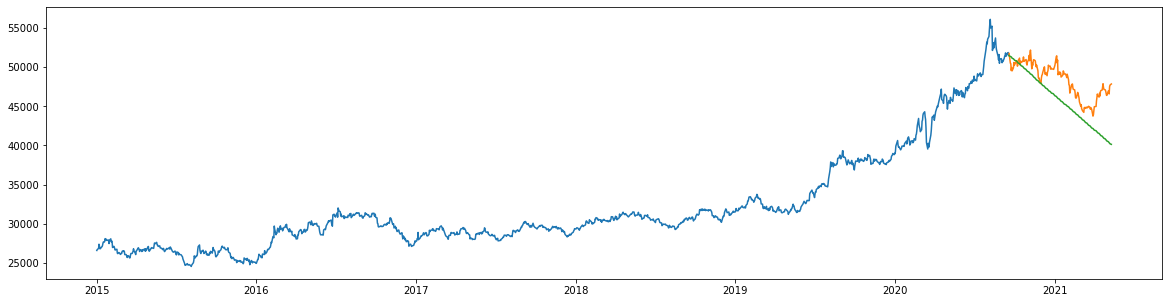

In [14]:
plt.figure(figsize=(20,5))
plt.plot(train,label="Training")
plt.plot(test,label="Testing")
plt.plot(prediction,label="Pridiction")
plt.show()

In [15]:
#Using ARIMA

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Value):
    result=adfuller(Value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [18]:
adfuller_test(df.y)

ADF Test Statistic : 0.14178905878168965
p-value : 0.9688011007592553
#Lags Used : 14
Number of Observations Used : 1622
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df['First Difference'] = df['y'] - df['y'].shift(1)

In [100]:
df['Seasonal First Difference']=df['y']-df['y'].shift(12)

In [21]:
ts_log = np.log(df.y)

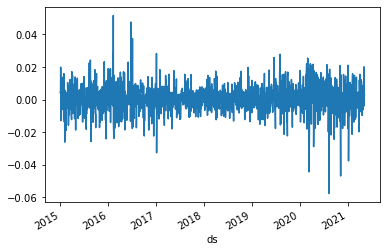

In [22]:
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff.dropna().plot()

In [23]:
ts_log_diff = ts_log_diff.dropna()

In [24]:
adfuller_test(ts_log_diff)

ADF Test Statistic : -40.76915716364963
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1635
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


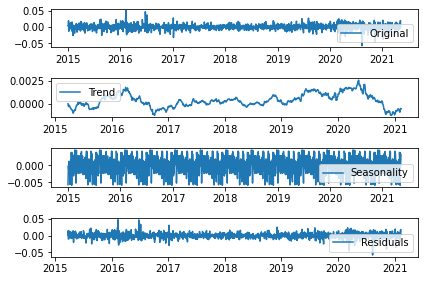

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_diff,period=124)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

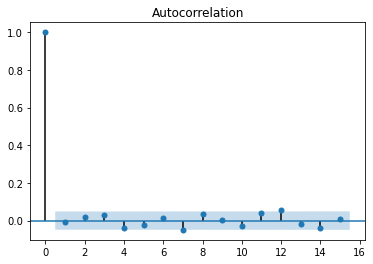

In [27]:
ACF = plot_acf(ts_log_diff,lags=15)

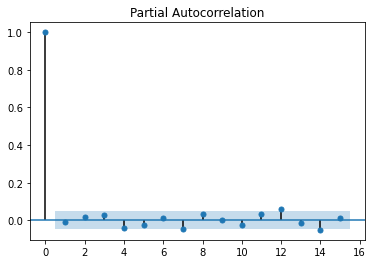

In [28]:
PACF = plot_pacf(ts_log_diff,lags=15)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
model = ARIMA(df.y, order=(7,1,12))
result = model.fit()
print(result.summary())

C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1636
Model:                ARIMA(7, 1, 12)   Log Likelihood              -11695.908
Method:                       css-mle   S.D. of innovations            307.971
Date:                Mon, 10 May 2021   AIC                          23433.816
Time:                        21:42:43   BIC                          23547.216
Sample:                             1   HQIC                         23475.879
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7616      7.237      1.625      0.104      -2.423      25.946
ar.L1.D.y     -1.4193      0.316     -4.497      0.000      -2.038      -0.801
ar.L2.D.y     -1.2806      0.538     -2.379      0.0

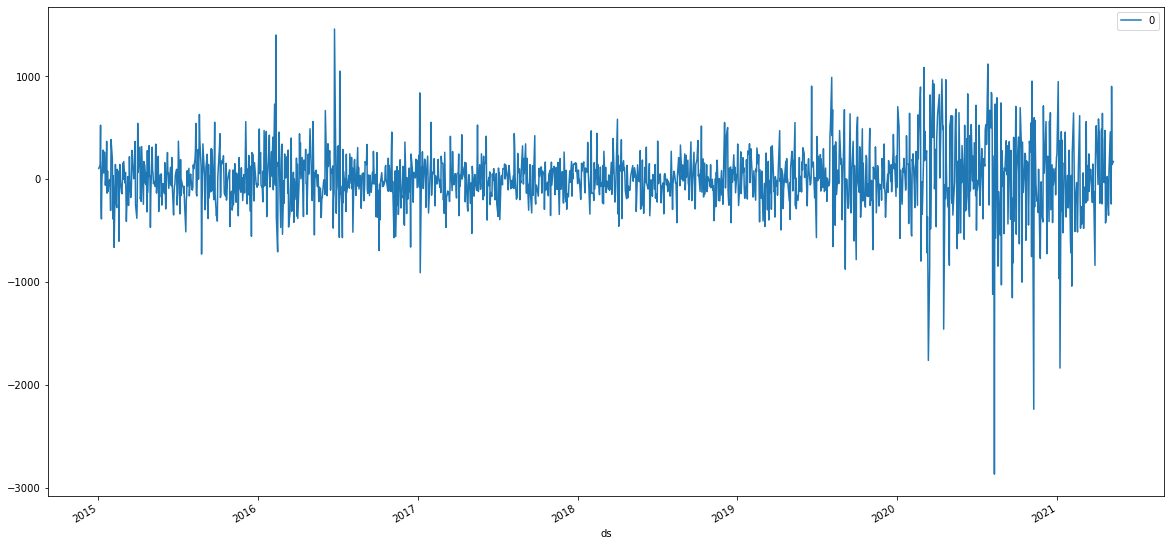

In [86]:
# plot residual errors
residuals = pd.DataFrame(result.resid)
residuals.plot()
pyplot.show()

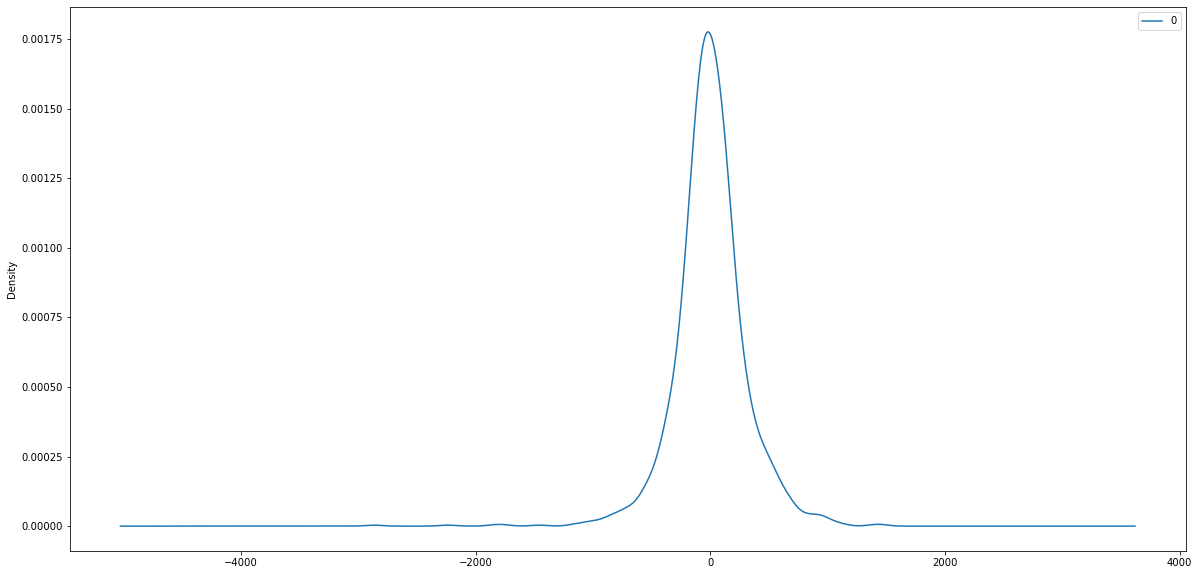

                 0
count  1636.000000
mean      1.274001
std     308.089541
min   -2867.012959
25%    -140.847327
50%      -5.691944
75%     145.508421
max    1457.324136


In [87]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

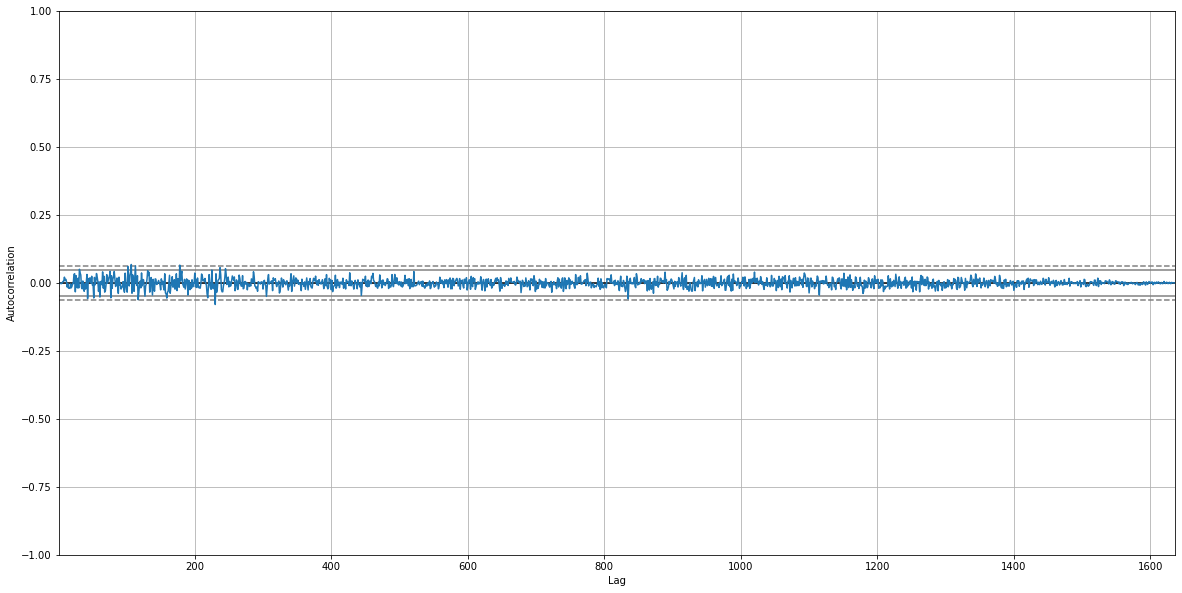

In [88]:
from pandas.plotting import autocorrelation_plot
#Residual autocorrelation plot
autocorrelation_plot(residuals)
pyplot.show()

In [89]:
prediction2 = pd.Series(result.fittedvalues,copy=True)

In [90]:
prediction2

ds
2015-01-02    11.761564
2015-01-05    10.848616
2015-01-06    14.968550
2015-01-07    16.446853
2015-01-08    36.807973
                ...    
2021-05-04    -5.521019
2021-05-05    51.689638
2021-05-06    44.587367
2021-05-07    42.812118
2021-05-10   -29.761687
Length: 1636, dtype: float64

In [91]:
#convert to cumulative sum

In [92]:
prediction2_sum = prediction2.cumsum()

In [93]:
print(prediction2_sum)

ds
2015-01-02       11.761564
2015-01-05       22.610181
2015-01-06       37.578731
2015-01-07       54.025584
2015-01-08       90.833557
                  ...     
2021-05-04    19080.406554
2021-05-05    19132.096192
2021-05-06    19176.683559
2021-05-07    19219.495678
2021-05-10    19189.733990
Length: 1636, dtype: float64


In [94]:
prediction2_sum_log = pd.Series(ts_log, index=ts_log.index)
prediction2_sum_log = prediction2_sum_log.add(prediction2_sum,fill_value=0)
prediction2_sum_log.head()

ds
2015-01-01    10.188140
2015-01-02    21.953983
2015-01-05    32.808090
2015-01-06    47.796482
2015-01-07    64.235048
dtype: float64

In [95]:
predictions_ARIMA=np.exp(prediction2_sum_log)

C:\Users\Shaurya\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


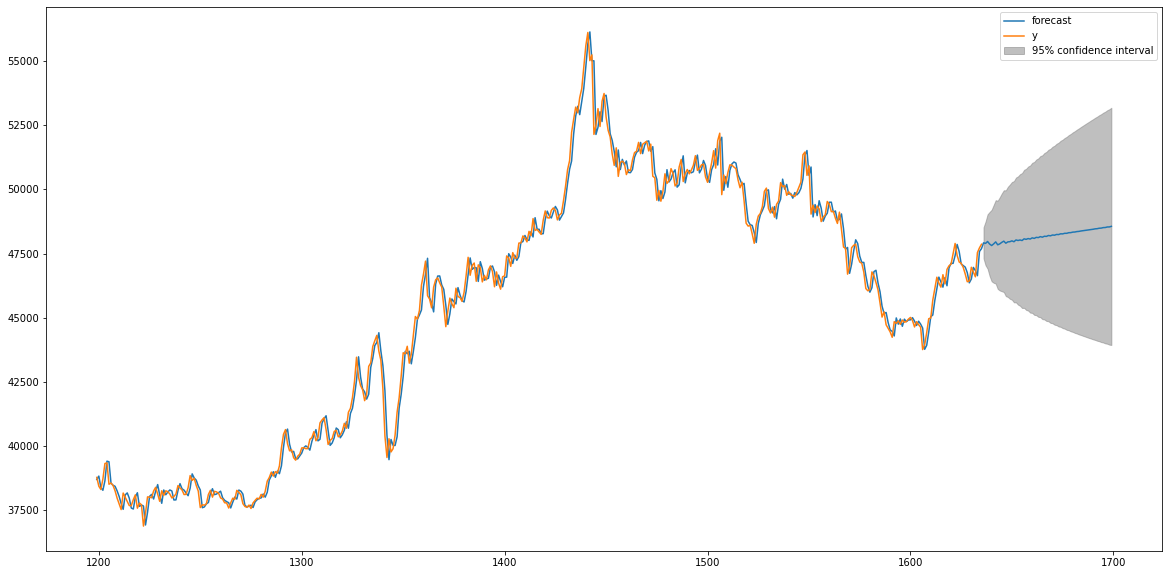

In [107]:
rcParams['figure.figsize']=20,10
result.plot_predict(1200,1700)
x=result.forecast(steps=120)